In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

In [3]:
# Load the dataset
data = load_boston()
X = data.data
y = data.target


In [4]:
# Define scoring metrics
scoring_metrics = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

In [5]:
# Learning rates to test
learning_rates = [0.1, 0.01, 0.001, 0.0001]
n_estimators_list = [1000, 10000]


In [6]:
# Store residuals for plotting
residuals_df = pd.DataFrame()

In [7]:

# Visualizing residual convergence using training set
for lr in learning_rates:
    model = GradientBoostingRegressor(
        learning_rate=lr,
        n_estimators=1000,
        max_depth=1,
        random_state=42
    )
    model.fit(X, y)
    staged_preds = list(model.staged_predict(X))
    residuals = [np.mean(y - y_pred) for y_pred in staged_preds]
    residuals_df[str(lr)] = residuals

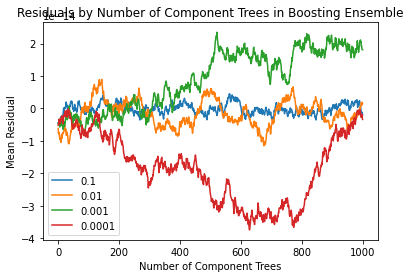

In [8]:
# Plot residual convergence
residuals_df.plot()
plt.title('Residuals by Number of Component Trees in Boosting Ensemble')
plt.xlabel('Number of Component Trees')
plt.ylabel('Mean Residual')
plt.show()


In [9]:
# Cross-validation evaluation for different combinations
for n_estimators in n_estimators_list:
    for lr in learning_rates:
        model = GradientBoostingRegressor(
            learning_rate=lr,
            n_estimators=n_estimators,
            max_depth=1,
            random_state=42
        )
        scores = cross_validate(model, X, y, cv=10, scoring=scoring_metrics)
        print(f"Learning Rate: {lr}, n_estimators: {n_estimators}")
        print("Mean MAE: %.2f" % np.mean(scores['test_mae']))
        print("Mean MSE: %.2f" % np.mean(scores['test_mse']))
        print("Mean R2: %.2f\n" % np.mean(scores['test_r2']))

Learning Rate: 0.1, n_estimators: 1000
Mean MAE: 3.02
Mean MSE: 20.09
Mean R2: 0.48

Learning Rate: 0.01, n_estimators: 1000
Mean MAE: 3.16
Mean MSE: 21.63
Mean R2: 0.52

Learning Rate: 0.001, n_estimators: 1000
Mean MAE: 5.09
Mean MSE: 51.44
Mean R2: -0.17

Learning Rate: 0.0001, n_estimators: 1000
Mean MAE: 6.76
Mean MSE: 86.13
Mean R2: -1.11

Learning Rate: 0.1, n_estimators: 10000
Mean MAE: 3.30
Mean MSE: 23.94
Mean R2: 0.34

Learning Rate: 0.01, n_estimators: 10000
Mean MAE: 3.03
Mean MSE: 20.28
Mean R2: 0.48

Learning Rate: 0.001, n_estimators: 10000
Mean MAE: 3.16
Mean MSE: 21.63
Mean R2: 0.52

Learning Rate: 0.0001, n_estimators: 10000
Mean MAE: 5.09
Mean MSE: 51.45
Mean R2: -0.17



In [10]:
# Baseline: Single decision stump
stump = DecisionTreeRegressor(max_depth=1)
stump_scores = cross_validate(stump, X, y, cv=10, scoring=scoring_metrics)
print("Single Decision Tree Stump:")
print("Mean MAE: %.2f" % np.mean(stump_scores['test_mae']))
print("Mean MSE: %.2f" % np.mean(stump_scores['test_mse']))
print("Mean R2: %.2f" % np.mean(stump_scores['test_r2']))

Single Decision Tree Stump:
Mean MAE: 6.34
Mean MSE: 70.54
Mean R2: -0.85
